# Compute drawdowns

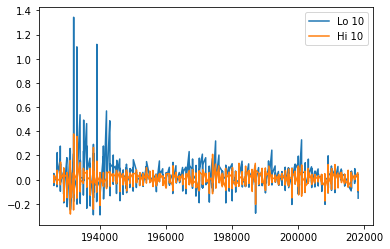

In [22]:
import pandas as pd
data = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv', header=0, index_col=0, parse_dates=True, na_values=99.99)
returns = data[['Lo 10', 'Hi 10']]
returns = returns/100
returns.plot.line()

In [23]:
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [24]:
#Clean up steps to get index in terms of periods

In [25]:
# The dates were not parsed baecause the type is integer
returns.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [26]:
returns.index=pd.to_datetime(returns.index, format=("%Y%m"))
returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [27]:
returns.head()

,Lo 10,Hi 10
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [28]:
# To convert the index to periods
returns.index = returns.index.to_period('M')
returns.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [30]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
Lo 10    1110 non-null float64
Hi 10    1110 non-null float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdowns

Steps:
    1. Compute a wealth index
    2. Compute previous peaks
    3. Compute drawdown - the wealth value as a percentage of the previous peak

In [32]:
# Start with 1000 dollars, and calculate the growth of a dollar over time
wealth_index = 1000* (1+returns["Hi 10"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: Hi 10, dtype: float64

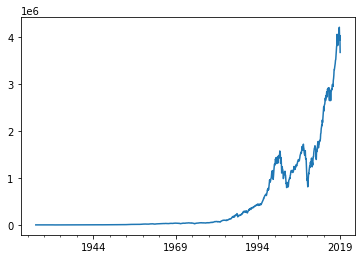

In [33]:
wealth_index.plot.line()

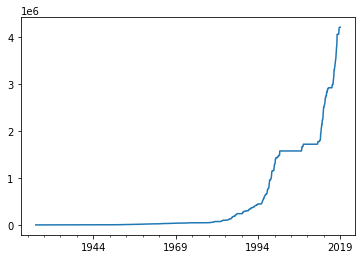

In [34]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

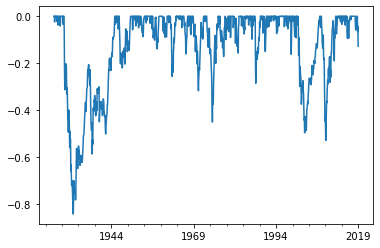

In [35]:
# Percentage loss as of previous peak
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [36]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: Hi 10, dtype: float64

In [37]:
# Drawdowns are negative numbers and the maximum drawdown is lowest number, which is min
drawdown.min()

-0.8400375277943123

In [39]:
#largest drawdown since 1975
drawdown["1975":].min()

-0.5280945042309304

In [40]:
# When did that happen? The index tells when that happened
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [42]:
# Looking at entire period
drawdown.idxmin()

Period('1932-05', 'M')

In [45]:
## Create a function for all that computed above
def drawdown(ret: pd.Series):
    wealth_index = 1000* (1+ret).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index, 
        "Peaks": previous_peaks, 
        "Drawdowns": drawdowns
    })   

In [47]:
drawdown(returns["Hi 10"]).head()

,Wealth,Peaks,Drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


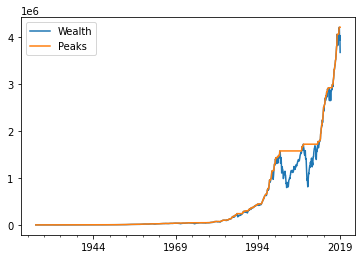

In [48]:
drawdown(returns["Hi 10"])[["Wealth", "Peaks"]].plot()

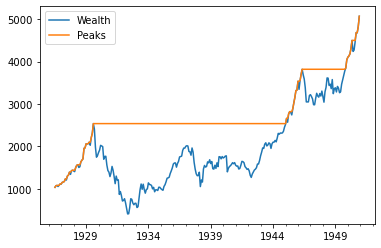

In [49]:
# If you check from 1950 you can see that there were peaks and troughs
drawdown(returns[:"1950"]["Hi 10"])[["Wealth", "Peaks"]].plot()

In [50]:
# we can see that dollar drops are higher and percentage loss is not that high
drawdown(returns["Hi 10"])[["Drawdowns"]].min()

Drawdowns   -0.840038
dtype: float64

In [51]:
drawdown(returns["Lo 10"])[["Drawdowns"]].min()

Drawdowns   -0.833001
dtype: float64

In [52]:
drawdown(returns["Lo 10"])[["Drawdowns"]].idxmin()

Drawdowns   1932-05
dtype: object

In [53]:
drawdown(returns["Hi 10"])[["Drawdowns"]].idxmin()

Drawdowns   1932-05
dtype: object

In [55]:
#next crash after 1940
drawdown(returns["1940":]["Lo 10"])[["Drawdowns"]].idxmin()

Drawdowns   1974-12
dtype: object

In [57]:
drawdown(returns["1975":]["Lo 10"])[["Drawdowns"]].min()

Drawdowns   -0.631207
dtype: float64

In [58]:
drawdown(returns["1975":]["Lo 10"])[["Drawdowns"]].idxmin()

Drawdowns   2009-02
dtype: object

In [59]:
drawdown(returns["1975":]["Hi 10"])[["Drawdowns"]].min()

Drawdowns   -0.528095
dtype: float64

In [60]:
drawdown(returns["1975":]["Lo 10"])[["Drawdowns"]].idxmin()

Drawdowns   2009-02
dtype: object